In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import statistics
from scipy.stats import norm

In [2]:
df = pd.read_excel(r"AI_3.xlsx")
df.rename(columns = {"Enter your Department":"Department", "Do you think AI already made an impact in your sector?":"Present_AI", "Do you think AI will have a major impact in your sector in the near future?":"Future_AI", "15 years from now, do you think AI will have a major impact on your job opportunities?":"Future_Job"}, inplace = True)
sample = df.copy()
sample.drop('Present_AI', axis = 'columns', inplace = True)
sample.drop('Future_AI', axis = 'columns', inplace = True)
sample.drop('Future_Job', axis = 'columns', inplace = True)
sample

,Department,CatP,CatF,CatJ
0,Technical,2,2,2
1,Data Science,2,1,1
2,Science,2,1,1
3,Technical,2,2,2
4,Data Science,2,2,2
...,...,...,...,...
158,Data Science,2,2,1
159,Data Science,2,2,-2
160,Technical,2,2,1
161,Technical,2,0,1


In [3]:
df_DS = pd.DataFrame(df[df['Department'] == 'Data Science'])
df_Med = pd.DataFrame(df[df['Department'] == 'Medical'])
df_Sci = pd.DataFrame(df[df['Department'] == 'Science'])
df_Tech = pd.DataFrame(df[df['Department'] == 'Technical'])

In [4]:
def nullHypothesis(df):
    data = df['CatP']
    data = list(data)
    print("Population: ", data)
    s = df['CatF']
    s = list(s)

    sample = random.sample(s, 20)
    print("Ssample: ", sample)

    population_mean = statistics.mean(data)
    population_stddev = statistics.stdev(data)
    n = 30
    sample_mean = statistics.mean(s)
    sample_stddev = statistics.stdev(s)
    print("\nPopulation Mean(μ): ", population_mean, "\n\nPopulation Standard Deviation(σ): ", population_stddev)
    print("\nNumber of Samples(n):", n, "\n\nSample Mean(x̅): ", sample_mean)

    x_axis = np.arange(-5, 5)
    plt.figure(figsize=(10, 8), dpi=80)
    plt.plot(x_axis, norm.pdf(x_axis, population_mean, population_stddev))
    plt.grid(color='gray', linestyle='--', linewidth=1)
    plt.title('Normal Distribution', fontsize='15')
    plt.xlabel('μ', fontsize='16')
    plt.ylabel(' Probability ', fontsize='12')
    plt.show() 

    Z_score = (sample_mean - population_mean)/(population_stddev / math.sqrt(n))
    print("For performing Z-test, we use the following formula: [Z = (x̅ - μ)/(σ / √n)]")
    print("\nZ = ", Z_score)

    C = input("\nChoose confidence value(90%, 95%, 99%): ")
    C = int(C) 
    if(C==90):
        print("\n\tThen α-value is 10% (or) 0.1")
        Z = 1.645
    elif (C==95):
        print("\n\tThen α-value is 5% (or) 0.05")
        Z = 1.960
    elif (C==99):
        print("\n\tThen α-value is 1% (or) 0.01")
        Z = 2.576
    elif (C!=90, 95, 99):
        print("\n\nEnter from the three values!!")
        exit()
    print("\nFor the claim, the Z-score right tail test is", Z)

    print("\nResult: ")
    k = -Z
    if(Z_score >  Z or (Z_score < k)):
        print("\n\tHere, ", Z_score,"is greater than ", Z)
        print("\n\t=> Hence, We reject NULL Hypothesis, H0")
    elif((Z_score < k)):
        print("\n\tHere, ", Z_score,"is lesser than ", Z)
        print("\n\t=> Hence, We reject NULL Hypothesis, H0")
    else:
        print("\n\tHere, ", Z_score,"is less than ", Z)
        print("\n\t=> Hence, We will not reject NUll hypothesis, H0")

Population:  [2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 0, 0, 2, 2, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 0, 0, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0]
Ssample:  [2, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 0, 2, 1, 2, 2, 2]

Population Mean(μ):  1.478527607361963 

Population Standard Deviation(σ):  0.7563510788516418

Number of Samples(n): 30 

Sample Mean(x̅):  1.7177914110429449


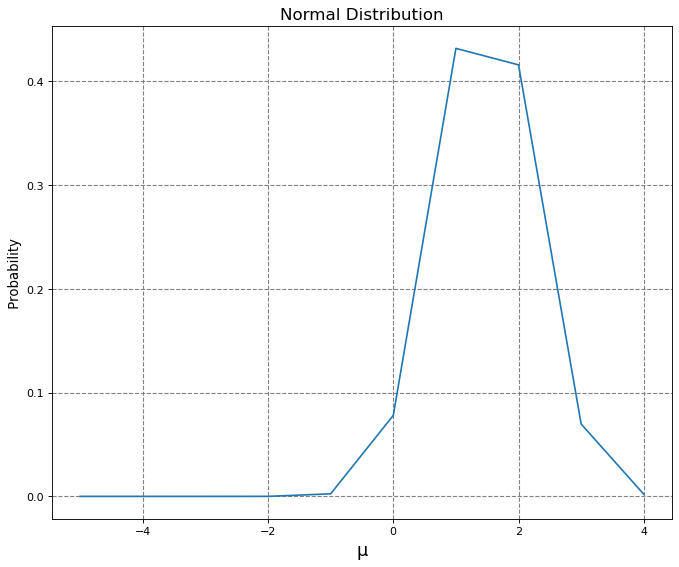

For performing Z-test, we use the following formula: [Z = (x̅ - μ)/(σ / √n)]

Z =  1.7326633905187672


In [ ]:
nullHypothesis(df)

In [ ]:
nullHypothesis(df_DS)

In [ ]:
nullHypothesis(df_Med)

In [ ]:
nullHypothesis(df_Tech)

In [ ]:
nullHypothesis(df_Sci)